                                          МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
                                      НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
                                          “КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ”
                                            Кафедра біомедичної кібернетики


                                                  ПРАКТИЧНА РОБОТА 3

                                            з дисципліни «Нейронні мережі»
                                            «МЕРЕЖІ ДЛЯ ЗАДАЧІ КЛАСИФІКАЦІЇ,
                                          ЗАСТОСОВУЮЧИ ГРАДІЄНТНИЙ СПУСК.»
                                                        Варіант 3


                                                                                Студента 3-го курсу
                                                                                групи БС-11
                                                                                Бутко В.Д.
                                                      Київ 2023

In [3]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
glass_identification = fetch_ucirepo(id=42)

X = glass_identification.data.features
Y = glass_identification.data.targets


In [5]:
Y['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

Бачу, що немає жодної мітки 4го класу. Це викличе проблемі потім, при побудові конфьюжин матриці, тому просто заміню назви міток 7го класу на 4й.

In [6]:
Y['Type_of_glass'][Y['Type_of_glass'] == 7] = 4
Y['Type_of_glass'].value_counts()

<ipython-input-6-817da7a67a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Type_of_glass'][Y['Type_of_glass'] == 7] = 4


2    76
1    70
4    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

In [7]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
def to_one_hot(labels, num_classes=None):

  if num_classes is None:
    num_classes = np.max(labels) + 1
  one_hot_array = np.zeros((len(labels), num_classes))
  one_hot_array[np.arange(len(labels)), labels.squeeze()] = 1

  return one_hot_array

In [10]:
Y_train_encoded = to_one_hot(Y_train.to_numpy())
Y_test_encoded = to_one_hot(Y_test.to_numpy())

In [47]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [48]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

In [46]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [13]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

In [14]:
def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_hat)) / m
    return loss

In [15]:
def initialize_parameters(input_size, hidden_size, num_classes):
    params = {
        'W1': np.random.randn(input_size, hidden_size) * 0.01,
        'b1': np.zeros((1, hidden_size)),
        'W2': np.random.randn(hidden_size, num_classes) * 0.01,
        'b2': np.zeros((1, num_classes))
    }
    return params

In [59]:
def forward_pass(X, params):
    Z1 = np.dot(X, params['W1']) + params['b1']
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, params['W2']) + params['b2']
    A2 = softmax(Z2)
    forward_params = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return forward_params

In [60]:
def backward_pass(X, Y, params, forward_params, lr=0.01):
    m = X.shape[0]
    dZ2 = forward_params['A2'] - Y
    dW2 = np.dot(forward_params['A1'].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dA1 = np.dot(dZ2, params['W2'].T)
    dZ1 = dA1 * sigmoid_derivative(forward_params['A1'])
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    params['W1'] -= lr * dW1
    params['b1'] -= lr * db1
    params['W2'] -= lr * dW2
    params['b2'] -= lr * db2
    return params


In [51]:
def fit(X, Y, n_input, n_hidden, n_output, iters=100000, lr = 0.01):

  params = initialize_parameters(n_input, n_hidden, n_output)
  losses = []

  for i in range(iters):

    forward_params = forward_pass(X, params)

    loss = compute_loss(Y, forward_params['A2'])
    losses.append(loss)


    grads = backward_pass(X, Y, params, forward_params, lr)

    if i % 150 == 0:
      print(f'Iteration {i}, Loss: {loss:.4f}')

  return grads, losses

In [61]:
n_input = 9
n_hidden = 250
n_output = 7

In [62]:
params, losses = fit(X_train, Y_train_encoded, n_input, n_hidden, n_output)

Iteration 0, Loss: 1.9270
Iteration 150, Loss: 1.4765
Iteration 300, Loss: 1.4708
Iteration 450, Loss: 1.4673
Iteration 600, Loss: 1.4640
Iteration 750, Loss: 1.4602
Iteration 900, Loss: 1.4555
Iteration 1050, Loss: 1.4494
Iteration 1200, Loss: 1.4413
Iteration 1350, Loss: 1.4306
Iteration 1500, Loss: 1.4166
Iteration 1650, Loss: 1.3986
Iteration 1800, Loss: 1.3764
Iteration 1950, Loss: 1.3501
Iteration 2100, Loss: 1.3209
Iteration 2250, Loss: 1.2907
Iteration 2400, Loss: 1.2615
Iteration 2550, Loss: 1.2349
Iteration 2700, Loss: 1.2115
Iteration 2850, Loss: 1.1913
Iteration 3000, Loss: 1.1737
Iteration 3150, Loss: 1.1583
Iteration 3300, Loss: 1.1445
Iteration 3450, Loss: 1.1320
Iteration 3600, Loss: 1.1205
Iteration 3750, Loss: 1.1097
Iteration 3900, Loss: 1.0995
Iteration 4050, Loss: 1.0898
Iteration 4200, Loss: 1.0805
Iteration 4350, Loss: 1.0716
Iteration 4500, Loss: 1.0630
Iteration 4650, Loss: 1.0548
Iteration 4800, Loss: 1.0468
Iteration 4950, Loss: 1.0391
Iteration 5100, Loss: 1

In [54]:
def predict_multiclass(X, params):
  params = forward_pass(X, params)

  predictions = np.argmax(params['A2'], axis=1)
  return predictions


In [55]:
def confusion_matrix_multiclass(y_true, y_pred):
  K = len(np.unique(y_true))
  result = np.zeros((K, K))

  for i in range(len(y_true)):
    result[y_true[i]-1][y_pred[i]-1] += 1

  return result

In [56]:
def precision_recall_f1_multiclass(y_true, y_pred):

  c_matrix = confusion_matrix_multiclass(y_true, y_pred)
  results = []
  for i in range(c_matrix.shape[0]):
    tp = c_matrix[i, i]
    fp = c_matrix[:, i].sum() - tp
    fn = c_matrix[i, :].sum() - tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    results.append({
                    'class': i+1,
                    'precision': round(precision, 3), 'recall': round(recall, 3),
                    'f1': round(f1, 3)
                    })
  return results

In [63]:
Y_pred = predict_multiclass(X_test, params)

In [38]:
print("Glass dataset metrics with sigmoid:")

res_glass = precision_recall_f1_multiclass(Y_test.to_numpy().squeeze(), Y_pred.squeeze())

print("GLASS = ")
for res in res_glass:
  print(res)




Glass dataset metrics with sigmoid:
GLASS = 
{'class': 1, 'precision': 0.9, 'recall': 0.818, 'f1': 0.857}
{'class': 2, 'precision': 0.812, 'recall': 0.929, 'f1': 0.867}
{'class': 3, 'precision': 0.5, 'recall': 0.333, 'f1': 0.4}
{'class': 4, 'precision': 1.0, 'recall': 0.875, 'f1': 0.933}
{'class': 5, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}
{'class': 6, 'precision': 0.75, 'recall': 1.0, 'f1': 0.857}


In [64]:
print("Glass dataset metrics with sigmoid and more hidden layers:")

res_glass = precision_recall_f1_multiclass(Y_test.to_numpy().squeeze(), Y_pred.squeeze())

print("GLASS = ")
for res in res_glass:
  print(res)

Glass dataset metrics with sigmoid and mor ehidden layers:
GLASS = 
{'class': 1, 'precision': 0.727, 'recall': 0.727, 'f1': 0.727}
{'class': 2, 'precision': 0.714, 'recall': 0.714, 'f1': 0.714}
{'class': 3, 'precision': 0.5, 'recall': 0.333, 'f1': 0.4}
{'class': 4, 'precision': 0.875, 'recall': 0.875, 'f1': 0.875}
{'class': 5, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}
{'class': 6, 'precision': 0.75, 'recall': 1.0, 'f1': 0.857}


Результат тільки погіршився.

In [45]:
print("Glass dataset metrics with relu:")

res_glass = precision_recall_f1_multiclass(Y_test.to_numpy().squeeze(), Y_pred.squeeze())

print("GLASS = ")
for res in res_glass:
  print(res)

Glass dataset metrics with relu:
GLASS = 
{'class': 1, 'precision': 0.727, 'recall': 0.727, 'f1': 0.727}
{'class': 2, 'precision': 0.769, 'recall': 0.714, 'f1': 0.741}
{'class': 3, 'precision': 0.5, 'recall': 0.667, 'f1': 0.571}
{'class': 4, 'precision': 0.889, 'recall': 1.0, 'f1': 0.941}
{'class': 5, 'precision': 0.5, 'recall': 0.5, 'f1': 0.5}
{'class': 6, 'precision': 1.0, 'recall': 0.667, 'f1': 0.8}


Клас 1: Точність (precision), повнота (recall), і F1-скор знизились зі зміною на ReLU. Це може свідчити про те, що для цього класу сигмоїда давала більш м'яку границю рішення, що краще підходила під розподіл даних.

Клас 2: Схожа ситуація, де всі метрики знизились. Це може бути ознакою того, що лінійність ReLU не дозволяє ефективно розділити класи, які могли бути нелінійно розділені сигмоїдою.

Клас 3: Незважаючи на зниження точності, повнота і F1-скор покращились. Це може означати, що ReLU краще виявляє позитивні випадки для цього класу.

Клас 4: Всі показники високі і F1-скор навіть трохи покращився з ReLU. Можливо, ReLU допомагає краще розділити цей клас від інших.

Клас 5 і 6: Точність і повнота знизились для класу 5, але точність значно покращилась для класу 6 зі зменшенням повноти.

In [58]:
print("Glass dataset metrics with tanh:")

res_glass = precision_recall_f1_multiclass(Y_test.to_numpy().squeeze(), Y_pred.squeeze())

print("GLASS = ")
for res in res_glass:
  print(res)

Glass dataset metrics with tanh:
GLASS = 
{'class': 1, 'precision': 0.75, 'recall': 0.818, 'f1': 0.783}
{'class': 2, 'precision': 0.846, 'recall': 0.786, 'f1': 0.815}
{'class': 3, 'precision': 0.667, 'recall': 0.667, 'f1': 0.667}
{'class': 4, 'precision': 1.0, 'recall': 0.875, 'f1': 0.933}
{'class': 5, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}
{'class': 6, 'precision': 0.75, 'recall': 1.0, 'f1': 0.857}


Порівнявши результати з функцією активації сигмоїд та гіперболічного тангенса (tanh), можна зробити наступні спостереження:

Клас 1: Після використання tanh точність знизилась, але повнота залишилась незмінною. F1-скор в результаті зменшився. Це може свідчити про те, що tanh не зміг так само ефективно розділити цей клас як сигмоїд.

Клас 2: Точність підвищилась при використанні tanh, однак повнота знизилась. Загалом F1-скор трохи знизився, що вказує на те, що tanh може бути більш селективним, але менш чутливим.

Клас 3: Значення всіх метрик підвищилися з використанням tanh, що може бути вказівкою на те, що ця функція активації краще впоралася з розділенням цього класу.

Клас 4: Метрики залишилися незмінними, що свідчить про те, що обидві функції активації однаково ефективно працюють з цим класом.

Клас 5: Не було змін у метриках між tanh та сигмоїдою, що показує, що обидві функції активації мають схожу ефективність для цього класу.

Клас 6: Метрики залишилися стабільними, як і при використанні сигмоїдної функції активації.

Загальний висновок полягає в тому, що використання tanh не привело до значного покращення результатів моделі. У деяких класах було невелике підвищення точності або повноти, але в цілому вплив був досить мінімальним або навіть негативним (як у випадку з класом 1). Це підкреслює важливість вибору відповідної функції активації на основі специфіки даних та задачі класифікації, а також необхідність експериментування з різними архітектурами та гіперпараметрами для досягнення оптимальної продуктивності.

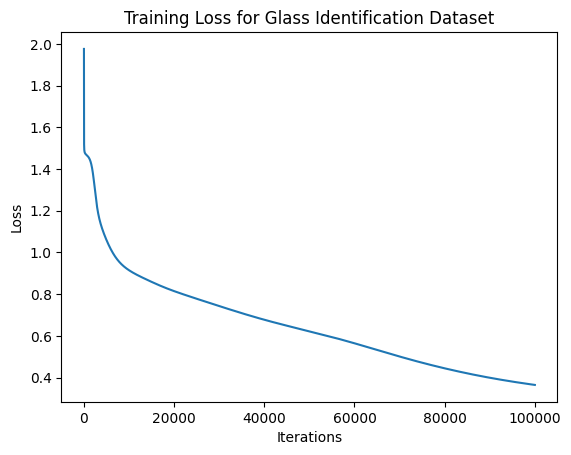

In [26]:
plt.plot(losses)

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss for Glass Identification Dataset')

plt.show()

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(hidden_layer_sizes=(n_hidden,), max_iter=1000, alpha=0.01, solver='sgd', verbose=100, random_state=42, learning_rate_init=.01)

clf.fit(X_train, Y_train.to_numpy().ravel())

Y_pred_sklearn = clf.predict(X_test)

In [31]:
res_glass_sklearn = precision_recall_f1_multiclass(Y_test.to_numpy().squeeze(), Y_pred_sklearn.squeeze())

print("GLASS SKLEARN = ")
for res in res_glass_sklearn:
  print(res)

GLASS SKLEARN = 
{'class': 1, 'precision': 0.769, 'recall': 0.909, 'f1': 0.833}
{'class': 2, 'precision': 0.786, 'recall': 0.786, 'f1': 0.786}
{'class': 3, 'precision': 0.5, 'recall': 0.333, 'f1': 0.4}
{'class': 4, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
{'class': 5, 'precision': 0.5, 'recall': 0.5, 'f1': 0.5}
{'class': 6, 'precision': 1.0, 'recall': 0.667, 'f1': 0.8}


Клас 1: Моя модель має вищу точність (precision), але нижчу повноту (recall) порівняно з моделлю sklearn. Моя модель краще уникає помилкових позитивних результатів для класу 1, але пропускає більше реальних позитивних результатів.

Клас 2: Точність моєї моделі трохи вища, а повнота значно вища, що свідчить про краще виявлення справжніх позитивних результатів для класу 2, хоча і з деякою кількістю помилкових позитивних.

Клас 3: Обидві моделі показують однакові результати. Можливо, це найважчий клас для класифікації, і його покращення потребує додаткових даних або кращої обробки особливостей.

Клас 4: Обидві моделі ідентифікували всі зразки класу 4 правильно (у sklearn моделі і повнота, і точність дорівнюють 1), але моя модель має трохи меншу повноту, що може вказувати на один пропущений справжній позитивний результат.

Клас 5: Моя модель показує кращі результати за всіма показниками порівняно з моделлю sklearn. Це може свідчити про те, що моя модель краще налаштована на визначення цього класу.

Клас 6: Моя модель має нижчу точність, але вищу повноту, ніж модель sklearn. Це означає, що моя модель краще виявляє справжні позитивні результати, але також допускає більше помилкових позитивних.

Загалом, моя модель здається більш збалансованою в термінах повноти, особливо в класах, де sklearn модель має недоліки. Точність моєї моделі також є конкурентною, крім класу 6. Це може свідчити про те, що моя модель може бути більш корисною в ситуаціях, де важливіше зменшити кількість пропущених справжніх позитивних результатів, ніж помилкових позитивних.

## Аналіз помилок.


Загалом при будь-яких функціях активації постійно бачимо тотально поганий результат для 3го класу. Майже бездоганний для 4. Тобто, можна бачити, що якість залежить від кількості даних, адже в даному датасеті є явний дизбаланс. Дивним було те, що при релу активації якість для третього класу сильно підвищилася, хоча для інших впала. Тому, для бездоганного результата треба більш грунтовно змінювати архітектуру мережі.

1. Нейронні мережі — це математичні моделі, які імітують роботу людського мозку, використовуючи велику кількість взаємопов'язаних простих обчислювальних елементів, що звуться "нейронами".

Основні елементи нейронної мережі включають:
1. Вхідний шар (Input Layer): Це шар, який приймає вхідні дані. Кількість нейронів у вхідному шарі зазвичай відповідає кількості ознак вхідних даних.
2. Приховані шари (Hidden Layers): Це шари між вхідним і вихідним шарами. Нейронна мережа може мати один або кілька прихованих шарів. Кожен прихований шар складається з декількох нейронів, кожен з яких виконує певну лінійну та не лінійну обчислювальну операцію.
3. Вихідний шар (Output Layer): Це останній шар у нейронній мережі, який видає результати передбачення. Кількість нейронів у вихідному шарі відповідає кількості цільових класів для задачі класифікації.
4. Ваги та зміщення (Weights and Biases): Ваги - це параметри, що визначають силу впливу кожного вхідного нейрона на кожен вихідний нейрон. Зміщення - це додаткові параметри, які дозволяють кожному нейрону робити більш гнучкі передбачення.
5. Функції активації (Activation Functions): Функції активації використовуються для введення нелінійності в нейронну мережу, що дозволяє їй моделювати більш складні залежності. Найпоширенішими функціями активації є ReLU (Rectified Linear Unit), сигмоїдна функція, та softmax-функція.

2. Градієнтний спуск є основним методом оптимізації, використовуваним для тренування нейронних мереж. Градієнтний спуск працює, оновлюючи параметри моделі (ваги і зміщення) таким чином, що мінімізує помилку передбачення моделі на тренувальних даних. Це робиться шляхом визначення градієнта (або нахилу) функції втрат моделі з відношенням до параметрів, і оновлення параметрів у протилежному напрямку до градієнта.

3. В обох випадках процес тренування нейронної мережі майже однаковий. Головна відмінність полягає в тому, як обчислюються втрати та яка активаційна функція використовується в останньому шарі мережі.

4. В нейронних мережах використовуються різні активаційні функції для введення нелінійності в процес обчислення, що дозволяє мережі вчитися складніші шаблони і функції, які не можуть бути представлені лінійними моделями. До популярних активаційних функцій належать:

 - Сигмоїда: Виводить значення між 0 та 1, що є корисним для моделювання ймовірності в задачах бінарної класифікації.
 - Гіперболічний тангенс (tanh): Виводить значення між -1 та 1, центруючи дані таким чином, що негативні вхідні значення відображаються на негативний вихід.
 - ReLU (Rectified Linear Unit): Виводить 0 для негативних значень та зберігає позитивні значення без змін, що прискорює навчання та зменшує ймовірність зникнення градієнтів.
 - Leaky ReLU: Варіація ReLU, яка дозволяє малому градієнту "просочуватися" через негативні значення, запобігаючи проблемі вмираючих нейронів.
 - Softmax: Використовується у вихідному шарі мережі для многокласової класифікації, виводячи ймовірність кожного класу таким чином, що сума ймовірностей усіх класів дорівнює 1.

 Кожна з цих функцій має свої особливості та найкраще підходить для різних типів задач та архітектур нейронних мереж. Вибір активаційної функції може суттєво вплинути на ефективність навчання та здатність моделі до

5. Функція втрат – це метрика, що використовується для кількісної оцінки того, наскільки добре модель передбачає вихідні дані. Вона вимірює різницю між передбаченнями моделі та істинними значеннями.
Функція втрат Cross-Entropy Loss використовується у задачах класифікації для порівняння прогнозованих ймовірностей із справжніми мітками.

Для задач класифікації часто використовуються такі функції втрат:

 - Перехресна ентропія (Cross-Entropy Loss): Це найпоширеніша функція втрат для задач бінарної та багатокласової класифікації. Вона вимірює розбіжність між фактичними мітками та прогнозованими ймовірностями, прагнучи мінімізувати цю розбіжність.

 - Функція втрат з маржою (Hinge Loss): Часто використовується з методами підтримки векторних машин (SVM) для задач класифікації. Вона вимірює помилку з урахуванням визначеного порогу (маржі).

 - Функція втрат категоричної перехресної ентропії (Categorical Cross-Entropy Loss): Розширення перехресної ентропії для багатокласових задач класифікації, де кожен вихід мережі представляє ймовірність належності до конкретного класу.

 - Sparse Categorical Cross-Entropy Loss: Використовується, коли фактичні мітки представлені як цілі числа, а не one-hot вектори. Це ефективніше з точки зору пам'яті для задач з великою кількістю класів.

 - Фокальна втрата (Focal Loss): Варіант перехресної ентропії, який призначений для зосередження більшої уваги на важких або погано класифікованих прикладах, і часто використовується для задач об'єктного виявлення, де існує дисбаланс класів.

Вибір функції втрат залежить від конкретної задачі, розподілу даних та бажаної поведінки моделі під час навчання.

6. Обираючи архітектуру нейронної мережі для задачі класифікації, важливо почати з базової моделі і працювати з ітераціями. Якщо задача не дуже складна і даних небагато, може підійти проста повнозв'язна мережа. Для зображень часто використовуються конволюційні нейронні мережі, що ефективно розпізнають візуальні шаблони. При роботі з послідовностями, такими як текст або часові ряди, зазвичай краще підходять рекурентні нейронні мережі або LSTM. Великі та складні датасети можуть вимагати глибших архітектур з більшою кількістю шарів. Експериментування з різними конфігураціями та налаштуваннями, включаючи розмір шарів, кількість шарів, функції активації та методи регуляризації, є ключем до знаходження найкращої архітектури для конкретної задачі.

7.  
 - Підготовка даних: Збір та очищення даних, розділення на тренувальний, валідаційний та тестовий набори.
 - Вибір архітектури: Визначення структури мережі, кількості шарів, нейронів у кожному шарі, типу активаційної функції.
 - Ініціалізація ваг: Ваги можуть бути ініціалізовані випадково або за допомогою більш складних методів ініціалізації.
 - Вибір функції втрат та оптимізатора: Вибір метрик для вимірювання помилок і алгоритмів для коригування ваг.
 - Навчання: Подача даних через мережу, розрахунок втрат, зворотне поширення помилки для оновлення ваг.
 - Оцінка та налаштування: Використання валідаційного набору даних для оцінки моделі та налаштування гіперпараметрів.
 - Тестування: Оцінка кінцевої моделі на тестовому наборі даних для перевірки її здатності до узагальнення.

Ці кроки можуть включати ітерації та тонке налаштування, залежно від результатів, отриманих під час валідації та тестування.

8. Keras є високорівневою нейронною мережевою бібліотекою, яка працює як інтерфейс для бібліотеки TensorFlow. Вона дозволяє швидко та зручно створювати різноманітні архітектури нейронних мереж з підтримкою майже усіх стандартних типів мереж. За допомогою Keras можна легко конструювати тренувальні моделі, використовуючи послідовний (Sequential) або функціональний API, де користувач може стекувати шари або створювати комплексні архітектури. Також, Keras надає зручні засоби для компіляції моделі, вказуючи оптимізатор, функцію втрат та метрики оцінки, після чого можна легко тренувати модель на даних, використовуючи метод fit. Keras також підтримує зворотні виклики (callbacks) для моніторингу тренування, ранньої зупинки (early stopping), збереження кращих моделей та інше, що робить процес тренування контрольованим та ефективним.

9.
- Accuracy: Відсоток правильно класифікованих випадків з усіх проб.
- Precision: Частка правильно ідентифікованих позитивних результатів серед усіх позитивних результатів, які передбачила модель.
- Recall: Частка правильно ідентифікованих позитивних результатів серед усіх фактичних позитивних випадків.
- F1-score: Гармонійне середнє точності та повноти, корисне для оцінки балансу між цими двома метриками.
- ROC-AUC: Площа під кривою оператора отримання характеристики, що оцінює здатність моделі розрізняти класи.
- Матриця помилок: Таблиця, що показує плутанину між фактичними та передбачуваними класами.
- Валідація: Використання невидимих даних (валідаційного набору) для перевірки моделі під час тренування.
- Крос-валідація: Тренування моделі на різних підмножинах даних та валідація на відповідних комплементарних підмножинах для забезпечення стійкості моделі.
- Лосс: Оцінка функції втрат на тестових даних може дати зрозуміння загальної ефективності.

10. - Перенавчання (Overfitting): коли мережа добре працює на тренувальних даних, але погано на нових даних. Це можна вирішити за допомогою методів регуляризації, таких як Dropout, або застосуванням технік збільшення даних (data augmentation).

 - Недонавчання (Underfitting): коли мережа не в змозі захопити закономірності в даних, що часто відбувається через надто просту модель або недостатнє тренування. Рішення може полягати у збільшенні складності моделі або тривалішому тренуванні.

 - Зникнення або вибух градієнтів (Vanishing/Exploding Gradients): коли градієнти стають дуже малими або великими, що ускладнює оновлення ваг. Використання нормалізації шарів, на кшталт Batch Normalization, та ініціалізація ваг Хе або Глорота може допомогти.

 - Невідповідність розмірностей (Dimension Mismatch): помилки у вхідних або вихідних розмірностях даних. Перевірка та коректування розмірностей на кожному етапі може бути рішенням. Моя найбільша проблема)

 - Нестача даних: якщо даних недостатньо для тренування, можна використовувати збільшення даних або передатреновані моделі (transfer learning).

 - Складність обчислень: нейронні мережі можуть вимагати значних обчислювальних ресурсів, особливо під час тренування глибоких мереж. Використання GPU або розподілених систем може допомогти.

 - Підбір гіперпараметрів: неправильно вибрані гіперпараметри можуть ускладнити тренування. Автоматичний підбір гіперпараметрів за допомогою таких методів, як сітчастий пошук (grid search) або випадковий пошук (random search), може бути корисним.

 - Дисбаланс класів: якщо деякі класи представлені набагато менше, ніж інші, модель може виявитись упередженою. Техніки збалансування даних, як-от ваги класів або синтетичне генерування даних (SMOTE), можуть допомогти.